<a href="https://colab.research.google.com/github/decorouz/DeepLeaning-with-Tensorflow/blob/main/1_0_classifying_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Classifying movie reviews: a binary classification problem

## The IMDB dataset
You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

### 1.1 Loading the IMDB dataset

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


The `num_words` indicates you will only keep the 10,000 most frequently occuring words. The variables `train_data` and `test_data` are list of reviews; each review is a list word indices (encoding a sequence of word). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [2]:
# Checkout the nature of the data.
print(len(train_data[0]))
train_labels[0]

218


1

Decoding one of the reviews back to english

In [3]:
word_index = imdb.get_word_index()

reversed_word_index = dict([(value, key) for key, value in word_index.items()])
decoded_review = " ".join([reversed_word_index.get(i-3, "?") for i in train_data[24999]])

decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? as a big fan of the original film it's hard to watch this show the ? set ? and ? ? sets rob any style from this remake the mood is never there instead it has the look and feel of so many television movies of the seventies crenna is not a bad choice as walter ? but his snappy wardrobe and ? apartment don't fit the mood of the original or make him an interesting character he does his best to make it work but samantha ? is a really bad choice the english accent and california looks can't hold a candle to barbara ? ? voice and sex appeal lee j ? tries ? to fashion barton ? but even his performance is just gruff without style br br it feels like the tv movie it was and again reminds me of what a remarkable film the original still is"

#### 1.2 Preparing the dataset
You can't feed a list into a model. You have to convert the list into tensors. There are two way to go about the conversion.
* Padding your lists so that they have the same length, turn them into an integer tensor of shape (samples, word_indices).
* One-hot encod your list to turn them into vectors of 0s, and 1's. 

In [4]:
import numpy as np
# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_test.shape

(25000, 10000)

In [6]:
# Vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### 1.3 Build the Network

Having 16 hidden unit means the weight `W` has a shape of `(input_dimension, 16)`.

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

### 1.4 Compiling the Model

In [8]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
             loss="binary_crossentropy",
             metrics =["accuracy"])

### 1.5 Setup Validation Approach:
In order to monitor during training the accuracy of the model on data it as never seen before, create a validation set by setting aside 10,000 samples from the original training data.

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 1.6 Training the model
You’ll now train the model for 20 epochs (20 iterations over all samples in the
x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by
passing the validation data as the validation_data argument.

In [10]:
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["acc"])


history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 43ms/step - loss: 0.5012 - acc: 0.7851 - val_loss: 0.3750 - val_acc: 0.8684
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2943 - acc: 0.9045 - val_loss: 0.3149 - val_acc: 0.8784
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2197 - acc: 0.9283 - val_loss: 0.2872 - val_acc: 0.8860
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1726 - acc: 0.9436 - val_loss: 0.2768 - val_acc: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1404 - acc: 0.9545 - val_loss: 0.2825 - val_acc: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1174 - acc: 0.9632 - val_loss: 0.2928 - val_acc: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0948 - acc: 0.9736 - val_loss: 0.3104 - val_acc: 0.8847
Epoch 8/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0798 - a

### 1.7 Plotting the training and validation loss


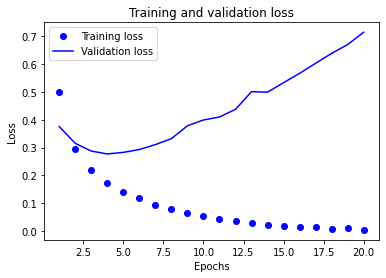

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc = history_dict["acc"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values , "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

### 1.8 Plotting the training and validation accuracy

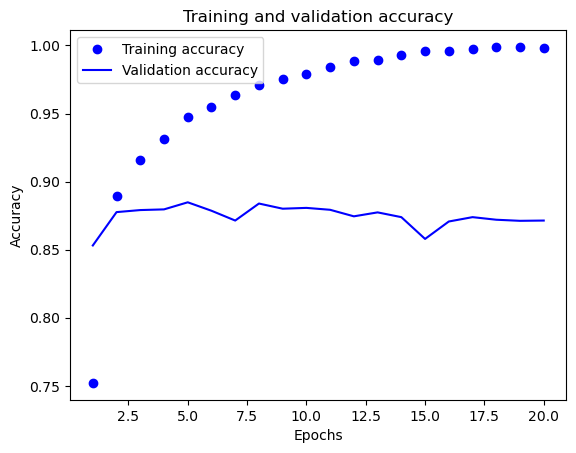

In [ ]:
plt.clf()

acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation accuracy")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 1.9 Retrain the model from scratch. 
From earlier training, it is observed that the validation accuracy and loss seems to peach at the fourth epoch. This is a case of overfitting. To prevent it, we could stop the training after three epochs.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 21ms/step - loss: 0.4685 - accuracy: 0.8130
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2779 - accuracy: 0.9028
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2198 - accuracy: 0.9205
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2919 - accuracy: 0.8836


### 1.10 Use train model to generate prediction on data

After having trained a network, you’ll want to use it in a practical setting. You can generate
the likelihood of reviews being positive by using the predict method:

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.28869104],
       [0.9995244 ],
       [0.9530702 ],
       ...,
       [0.11716624],
       [0.11392664],
       [0.7548393 ]], dtype=float32)

### 1.11 Further experiments
1. Try different hidden layers
2. Use logistic regression on the same dataset
3. Try different loss function 
4. Try using different activation function
